<a href="https://colab.research.google.com/github/mrsachinsinghai/Python/blob/master/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import io


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [9]:
df.shape
#df.columns

(6234, 12)

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

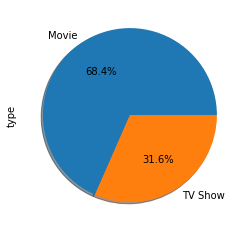

In [7]:
df["type"].value_counts().plot(kind="pie",shadow=True,autopct = '%1.1f%%')

In [8]:
df.groupby(['type']).count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,4265,4265,4137,3905,4070,4264,4265,4257,4265,4265,4265
TV Show,1969,1969,128,1759,1688,1959,1969,1967,1969,1969,1969


In [37]:
df.groupby(['type','country']).count()

show_id  ...  description
type    country                                                      ...             
Movie   Argentina                                                26  ...           26
        Argentina, Brazil, France, Poland, Germany, Den...        1  ...            1
        Argentina, Chile                                          1  ...            1
        Argentina, Chile, Peru                                    1  ...            1
        Argentina, France                                         1  ...            1
...                                                             ...  ...          ...
TV Show United States, Spain, Colombia, Mexico                    1  ...            1
        United States, Sweden                                     1  ...            1
        United States, United Kingdom                             7  ...            7
        United States, United Kingdom, Australia                  1  ...            1
        United States, United Kingdom, Canada                     1  ...            1

[636 rows x 10 columns]

In [25]:
#count=list(df['country'].dropna().unique())
#count
df.groupby(['type','country']).count()

show_id  ...  description
type    country                                                      ...             
Movie   Argentina                                                26  ...           26
        Argentina, Brazil, France, Poland, Germany, Den...        1  ...            1
        Argentina, Chile                                          1  ...            1
        Argentina, Chile, Peru                                    1  ...            1
        Argentina, France                                         1  ...            1
...                                                             ...  ...          ...
TV Show United States, Spain, Colombia, Mexico                    1  ...            1
        United States, Sweden                                     1  ...            1
        United States, United Kingdom                             7  ...            7
        United States, United Kingdom, Australia                  1  ...            1
        United States, United Kingdom, Canada                     1  ...            1

[636 rows x 10 columns]

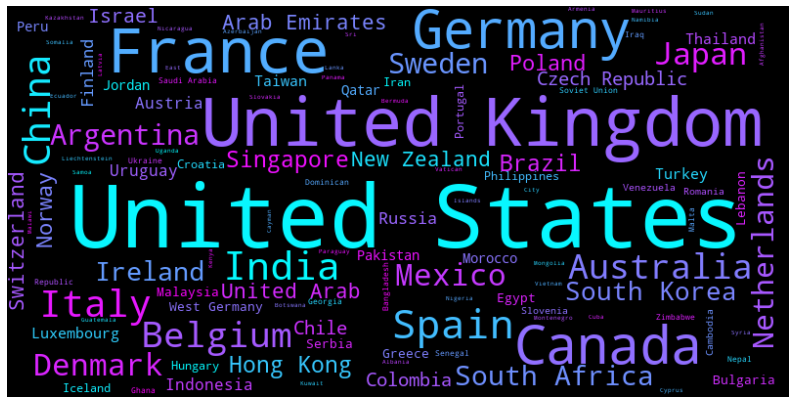

In [39]:
count=list(df['country'].dropna().unique())
cloud=WordCloud(colormap="cool",width=800,height=400).generate(" ".join(count))
fig=plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

Text(0.5, 1.0, 'Top 20 countries in terms of maximum number of movies on netflix')

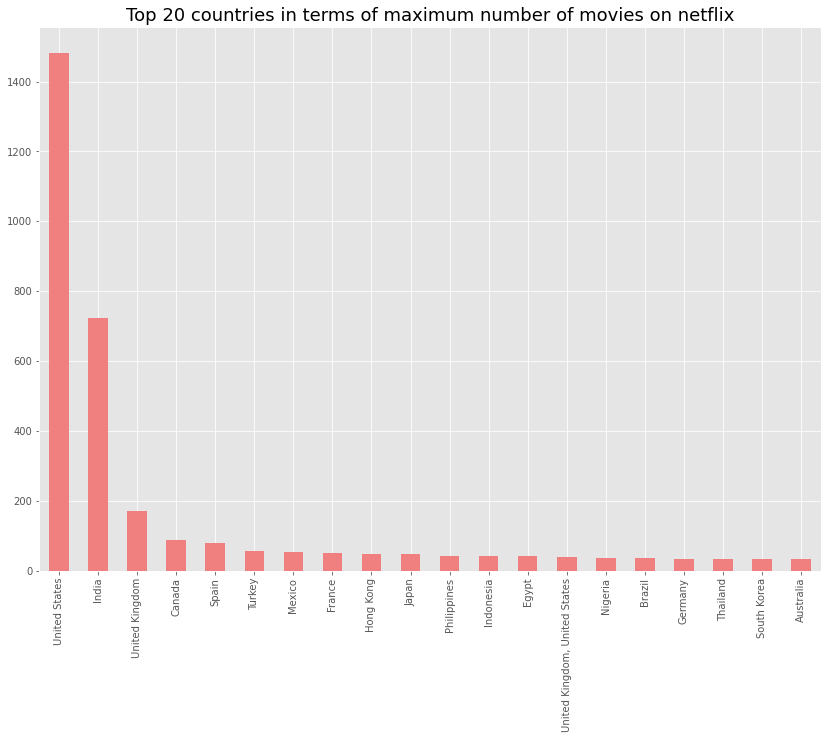

In [41]:
plt.style.use("ggplot")
plt.figure(figsize=(14,10))
df[df["type"]=="Movie"]["country"].value_counts()[:20].plot(kind="bar",color="lightcoral")
plt.title("Top 20 countries in terms of maximum number of movies on netflix",size=18)

Text(0.5, 1.0, 'top 20 movies per country')

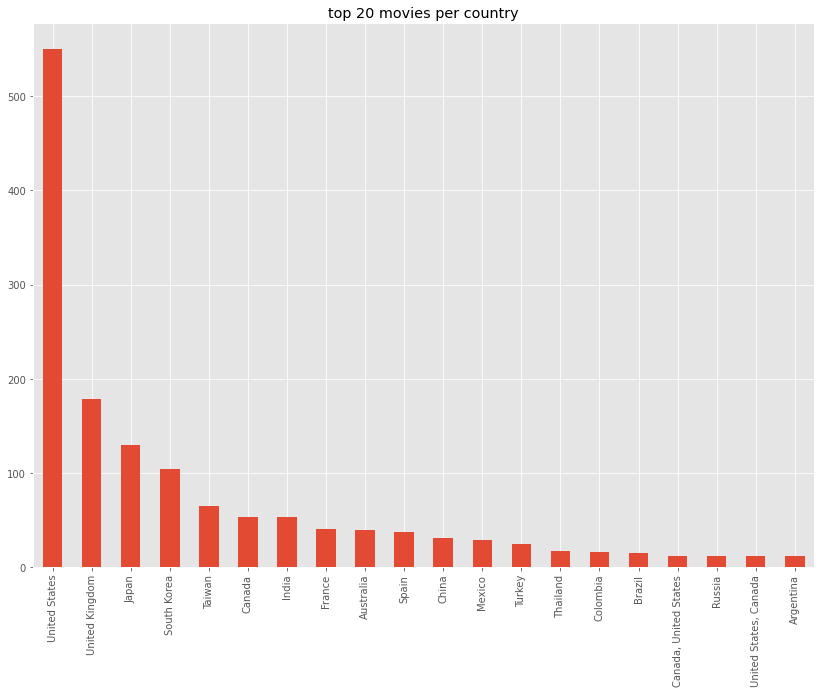

In [79]:
plt.figure(figsize=(14,10))
df[df["type"]=='TV Show']["country"].value_counts()[:20].plot(kind="bar")
plt.title ("top 20 movies per country")

In [80]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Text(0.5, 1.0, 'top 20 movies per country')

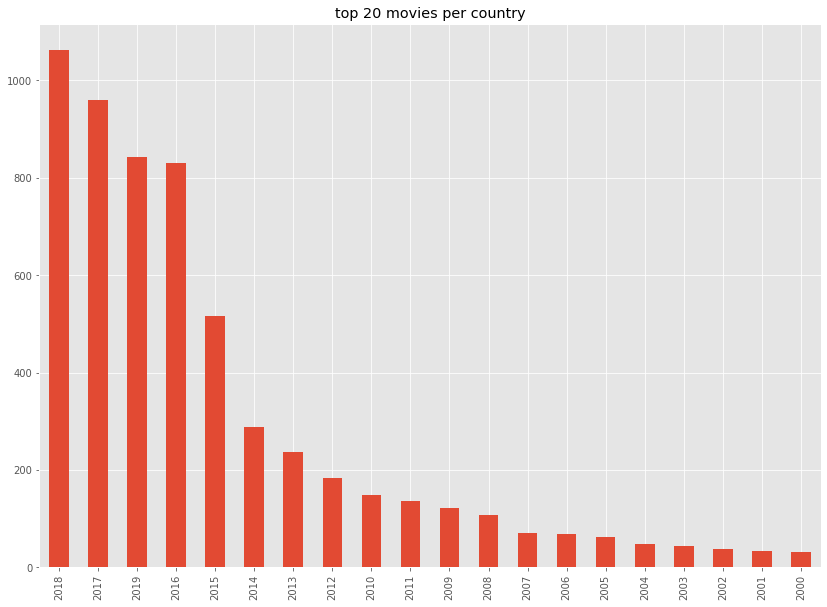

In [83]:
plt.figure(figsize=(14,10))
df["release_year"].value_counts()[:20].plot(kind="bar")
plt.title ("top 20 movies per country")

Text(0.5, 1.0, 'top 20 movies per country')

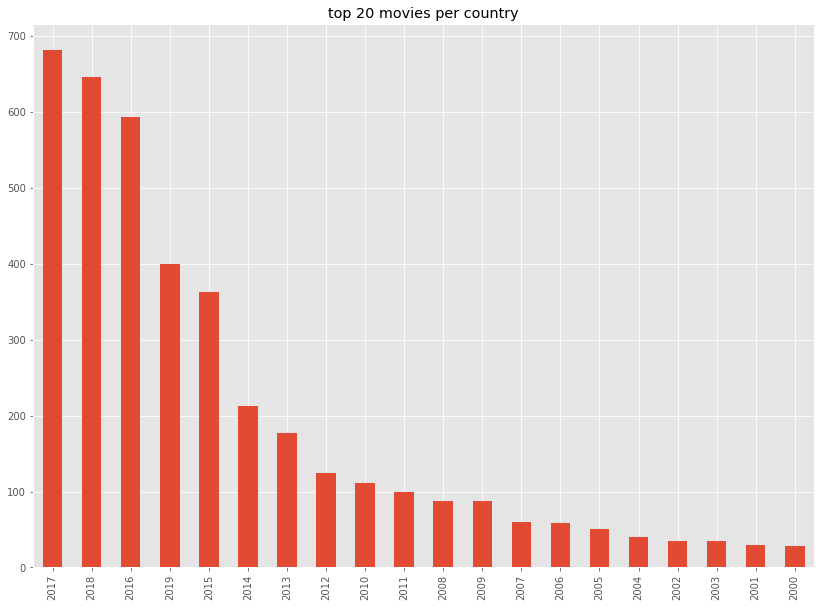

In [88]:
plt.figure(figsize=(14,10))
df[df['type'] =='Movie']["release_year"].value_counts()[:20].plot(kind="bar")
plt.title ("top 20 movies per country")

In [97]:
df[(df["type"]=="Movie") & (df["release_year"]==2017)]["title"].sample(10)

1704                                   Laerte-se
1562                                  Desolation
4611                     Susanne Bartsch: On Top
5122                        Tikli and Laxmi Bomb
1042                                   Mubarakan
2872    Joe Mande’s Award-Winning Comedy Special
1876                                   Withdrawn
5185                                  Incomplete
2986                               Chasing Coral
287                                    Heroin(e)
Name: title, dtype: object

In [99]:
df[(df["type"]=="Movie") & (df["release_year"]==2017)]["title"].sample(10)

2570                                                Bokeh
5093                                       History of Joy
349                                             Terrifier
4051       Gender Revolution: A Journey with Katie Couric
1615                     Bombshell: The Hedy Lamarr Story
3288    13TH: A Conversation with Oprah Winfrey & Ava ...
5539                                                 Rukh
53                                   Marc Maron: Too Real
2657                               The Russian Revolution
4466                                American Circumcision
Name: title, dtype: object

Text(0.5, 1.0, 'top 20 movies per country')

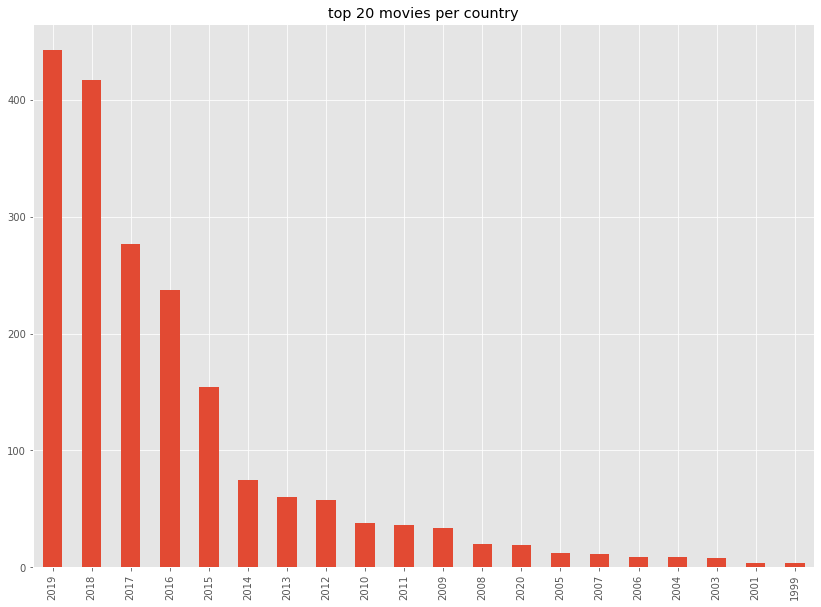

In [102]:
plt.figure(figsize=(14,10))
df[df['type'] =='TV Show']["release_year"].value_counts()[:20].plot(kind="bar")
plt.title ("top 20 movies per country")

In [103]:
df[(df["type"]=="TV Show") & (df["release_year"]==2019)]["title"].sample(10)

1664                                 WHAT / IF
1623                                Dead to Me
5590    Jack Whitehall: Travels with My Father
2092                      Most Beautiful Thing
6165                    QB1: Beyond the Lights
5812                                  The Rain
1604           How to Sell Drugs Online (Fast)
4805                         Styling Hollywood
4962                            Green Frontier
2862                              Another Life
Name: title, dtype: object

In [110]:
df[(df["type"]=="TV Show") & (df["release_year"]==2019)]["title"].sample(10)

2902                                Sexy Central
5781                                   Bad Blood
1137                 Dolly Parton's Heartstrings
6215                         Crazy Ex-Girlfriend
3944    Larry Charles' Dangerous World of Comedy
4136                   Teasing Master Takagi-san
6176                                   Wentworth
328             Transformers Rescue Bots Academy
1192                  Who Killed Little Gregory?
5694                              Schitt's Creek
Name: title, dtype: object

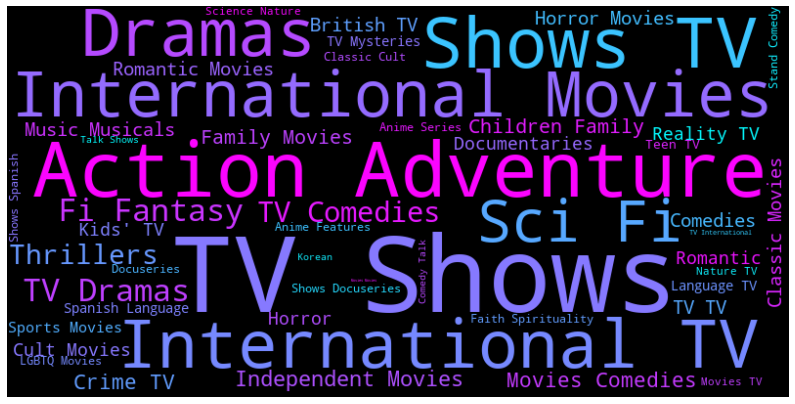

In [111]:
count=list(df["listed_in"].dropna().unique())
cloud=WordCloud(colormap="cool",width=800,height=400).generate(" ".join(count))
fig=plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

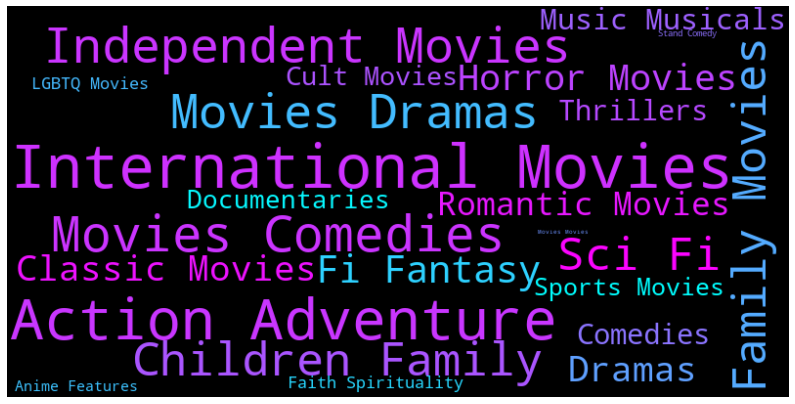

In [112]:
count=list(df[df["type"]=='Movie']["listed_in"].dropna().unique())
cloud=WordCloud(colormap="cool",width=800,height=400).generate(" ".join(count))
fig=plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

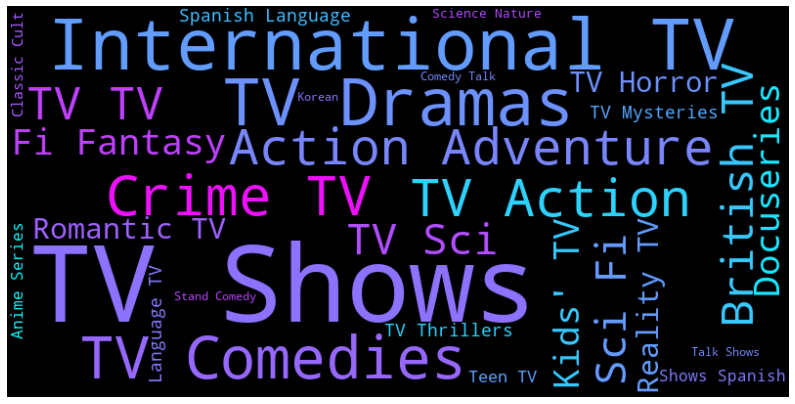

In [113]:
count=list(df[df["type"]=='TV Show']["listed_in"].dropna().unique())
cloud=WordCloud(colormap="cool",width=800,height=400).generate(" ".join(count))
fig=plt.figure(figsize=(14,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

Text(0.5, 1.0, 'top 20 movies per country')

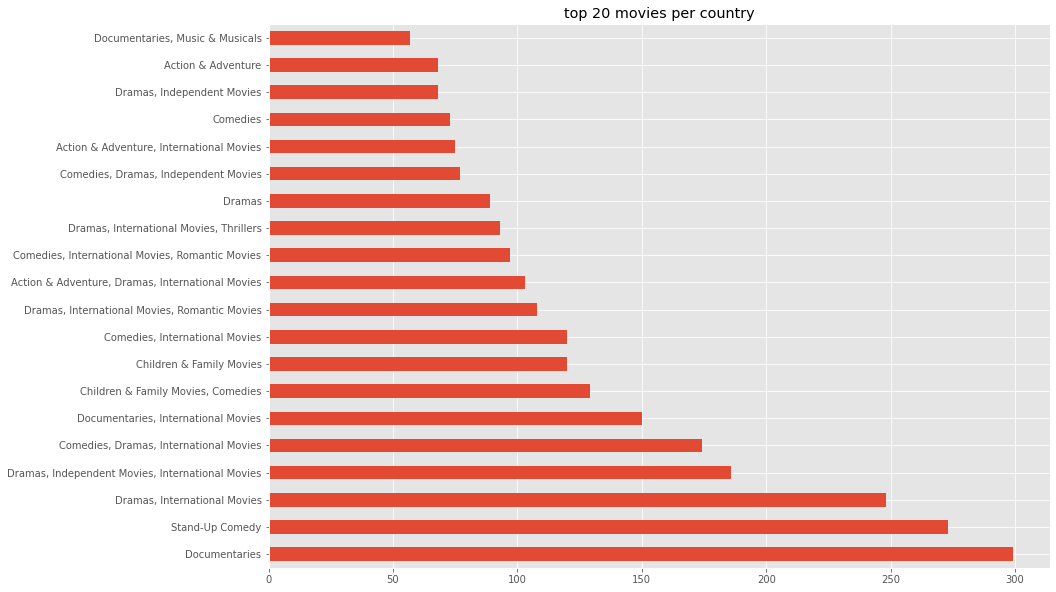

In [115]:
plt.figure(figsize=(14,10))
df[df['type'] =='Movie']["listed_in"].value_counts()[:20].plot(kind="barh")
plt.title ("top 20 movies per country")

In [116]:
df["listed_in"].value_counts()

Documentaries                                             299
Stand-Up Comedy                                           273
Dramas, International Movies                              248
Dramas, Independent Movies, International Movies          186
Comedies, Dramas, International Movies                    174
                                                         ... 
Classic & Cult TV, Kids' TV, Spanish-Language TV Shows      1
TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows               1
Action & Adventure, Comedies, Horror Movies                 1
Reality TV, Science & Nature TV                             1
Comedies, Cult Movies, LGBTQ Movies                         1
Name: listed_in, Length: 461, dtype: int64

In [119]:
df[(df["listed_in"]=="Documentaries") & (df["type"]=="Movie")]["title"].sample(10)

4401                      Figures of Speech
607           Monty Python Conquers America
1154                               De Palma
2832     Diana: 7 Days That Shook the World
3050         NOVA: Chinese Chariot Revealed
3063    NOVA: Secrets of the Shining Knight
4831                        A Leaf of Faith
3052             NOVA: Death Dive to Saturn
1899         JFK: The Making of a President
3049    NOVA: Building Chernobyl's MegaTomb
Name: title, dtype: object

In [122]:
df["type"]=="TV Show"][]["title"].sample(10)

KeyError: ignored